## Importing libararies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import scipy.stats as stats

## loading Data

In [2]:
df = pd.read_csv('/content/detect_dataset.csv')

In [3]:
df.head()
df.shape
df.info()
df.describe()
df.isnull().sum()
df.drop(['Unnamed: 7','Unnamed: 8'],axis=1,inplace = True)
df.duplicated().sum()
df['Output (S)'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
 7   Unnamed: 7  0 non-null      float64
 8   Unnamed: 8  0 non-null      float64
dtypes: float64(8), int64(1)
memory usage: 843.9 KB


array([0, 1])

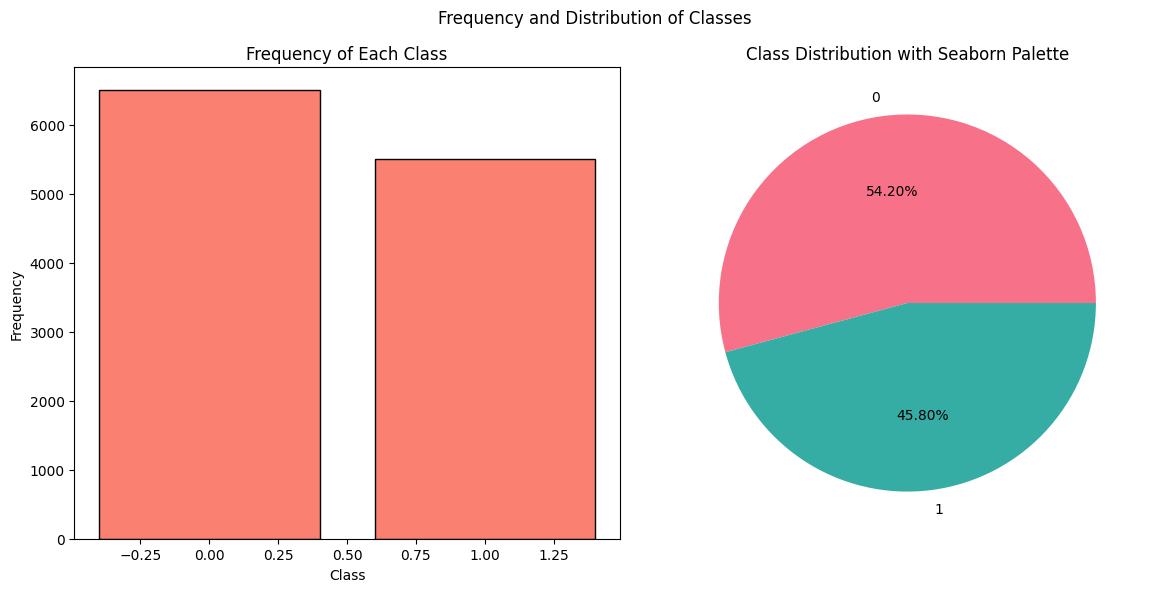

In [4]:
# Frequency data
value_counts = df['Output (S)'].value_counts()

# Create subplots for bar chart and pie chart with Seaborn color palette
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Bar chart
ax1.bar(value_counts.index, value_counts.values, color='salmon', edgecolor='black')
ax1.set_xlabel('Class')
ax1.set_ylabel('Frequency')
ax1.set_title('Frequency of Each Class')

# Pie chart with Seaborn color palette
colors = sns.color_palette("husl", len(value_counts))  # You can choose other palettes like 'pastel', 'dark', etc.
ax2.pie(value_counts, autopct='%0.2f%%', labels=value_counts.index, colors=colors)
ax2.set_title('Class Distribution with Seaborn Palette')

plt.suptitle('Frequency and Distribution of Classes')
plt.tight_layout()
plt.show()


**0 (no fault) class appear more in the dataset**

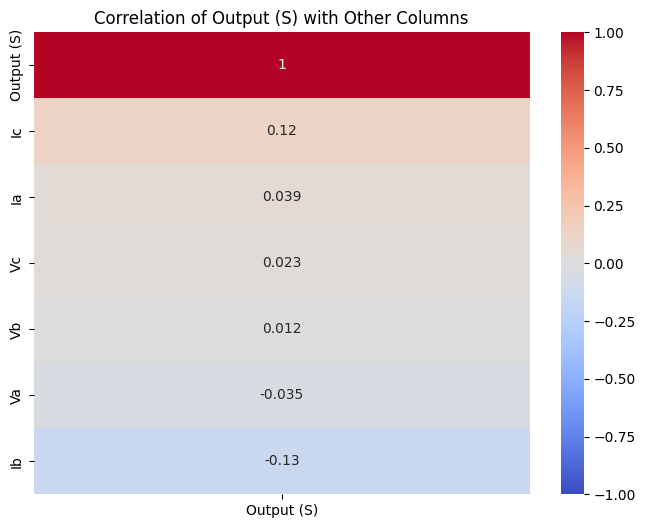

In [5]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr()[['Output (S)']].sort_values(by='Output (S)', ascending=False), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation of Output (S) with Other Columns')
plt.show()


<ipython-input-6-3f4e473c5187>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[ls[i * 3 + j]], color=colors[i * 3 + j], shade=True)  # Added color and shade
<ipython-input-6-3f4e473c5187>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[ls[i * 3 + j]], color=colors[i * 3 + j], shade=True)  # Added color and shade
<ipython-input-6-3f4e473c5187>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[ls[i * 3 + j]], color=colors[i * 3 + j], shade=True)  # Added color and shade
<ipython-input-6-3f4e473c5187>:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an err

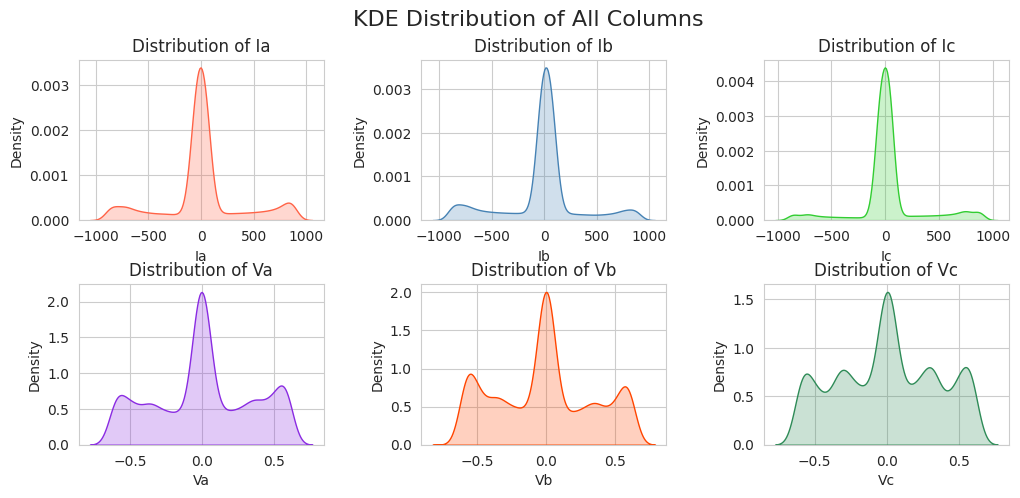

In [6]:
ls = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']


# Custom color palette for the KDE plots
colors = ['#FF6347', '#4682B4', '#32CD32', '#8A2BE2', '#FF4500', '#2E8B57']

plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")  # Set Seaborn style for better aesthetics

for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        sns.kdeplot(df[ls[i * 3 + j]], color=colors[i * 3 + j], shade=True)  # Added color and shade
        plt.title(f'Distribution of {ls[i * 3 + j]}')  # Added title to each subplot
        plt.xlabel(ls[i * 3 + j])  # Label x-axis for each plot

plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.suptitle('KDE Distribution of All Columns', fontsize=16)
plt.show()

**all distribution peak around 0**<br>
**Va, Vb, Vc also peak around 0.5 and -0.5**

<ipython-input-7-7b779d59b74f>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Variable', y='Value', data=df_melted1, ax=ax1, palette=palette1)
<ipython-input-7-7b779d59b74f>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(x='Variable', y='Value', data=df_melted2, ax=ax2, palette=palette2)


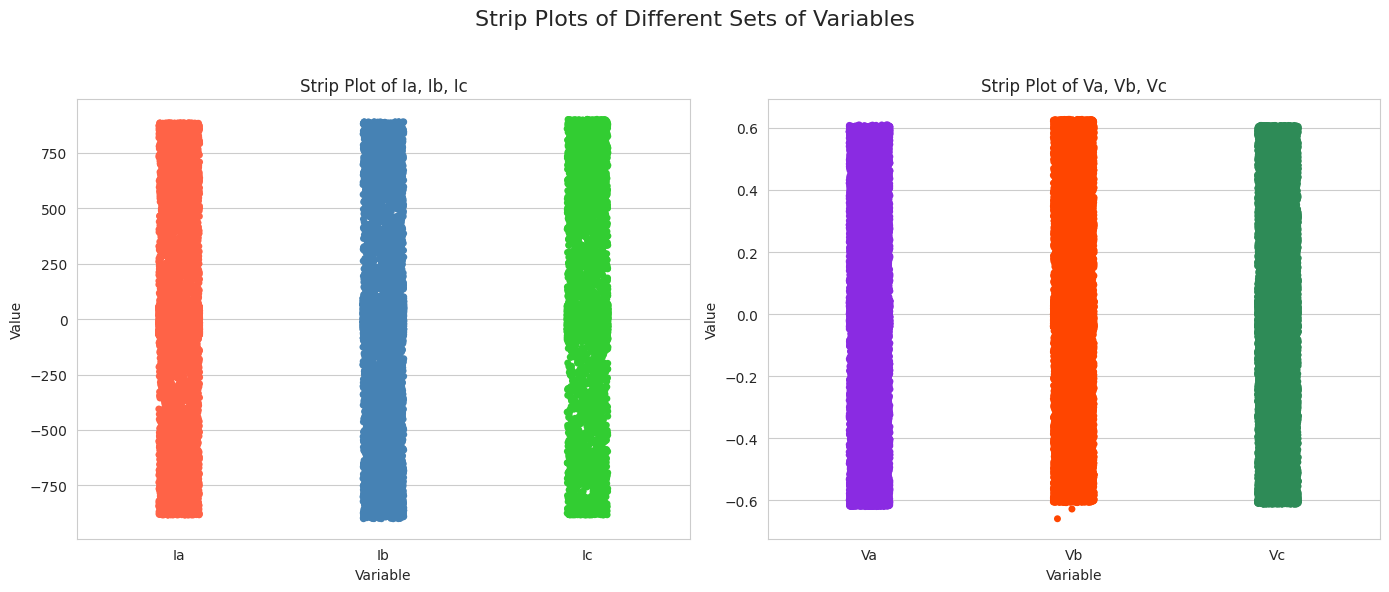

In [7]:

# Define custom color palette for each plot
palette1 = ['#FF6347', '#4682B4', '#32CD32']  # Colors for Ia, Ib, Ic
palette2 = ['#8A2BE2', '#FF4500', '#2E8B57']  # Colors for Va, Vb, Vc

# Melting the data
ls = ['Ia','Ib','Ic','Va','Vb','Vc']
df_melted1 = df[ls[:3]].melt(var_name='Variable', value_name='Value')
df_melted2 = df[ls[3:]].melt(var_name='Variable', value_name='Value')

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Strip plot for Ia, Ib, Ic with custom palette
sns.stripplot(x='Variable', y='Value', data=df_melted1, ax=ax1, palette=palette1)
ax1.set_title('Strip Plot of Ia, Ib, Ic')

# Strip plot for Va, Vb, Vc with custom palette
sns.stripplot(x='Variable', y='Value', data=df_melted2, ax=ax2, palette=palette2)
ax2.set_title('Strip Plot of Va, Vb, Vc')

# Set a global title and adjust layout
fig.suptitle('Strip Plots of Different Sets of Variables', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to include the overall title

# Show the plot
plt.show()

**Shows distribution of values**

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

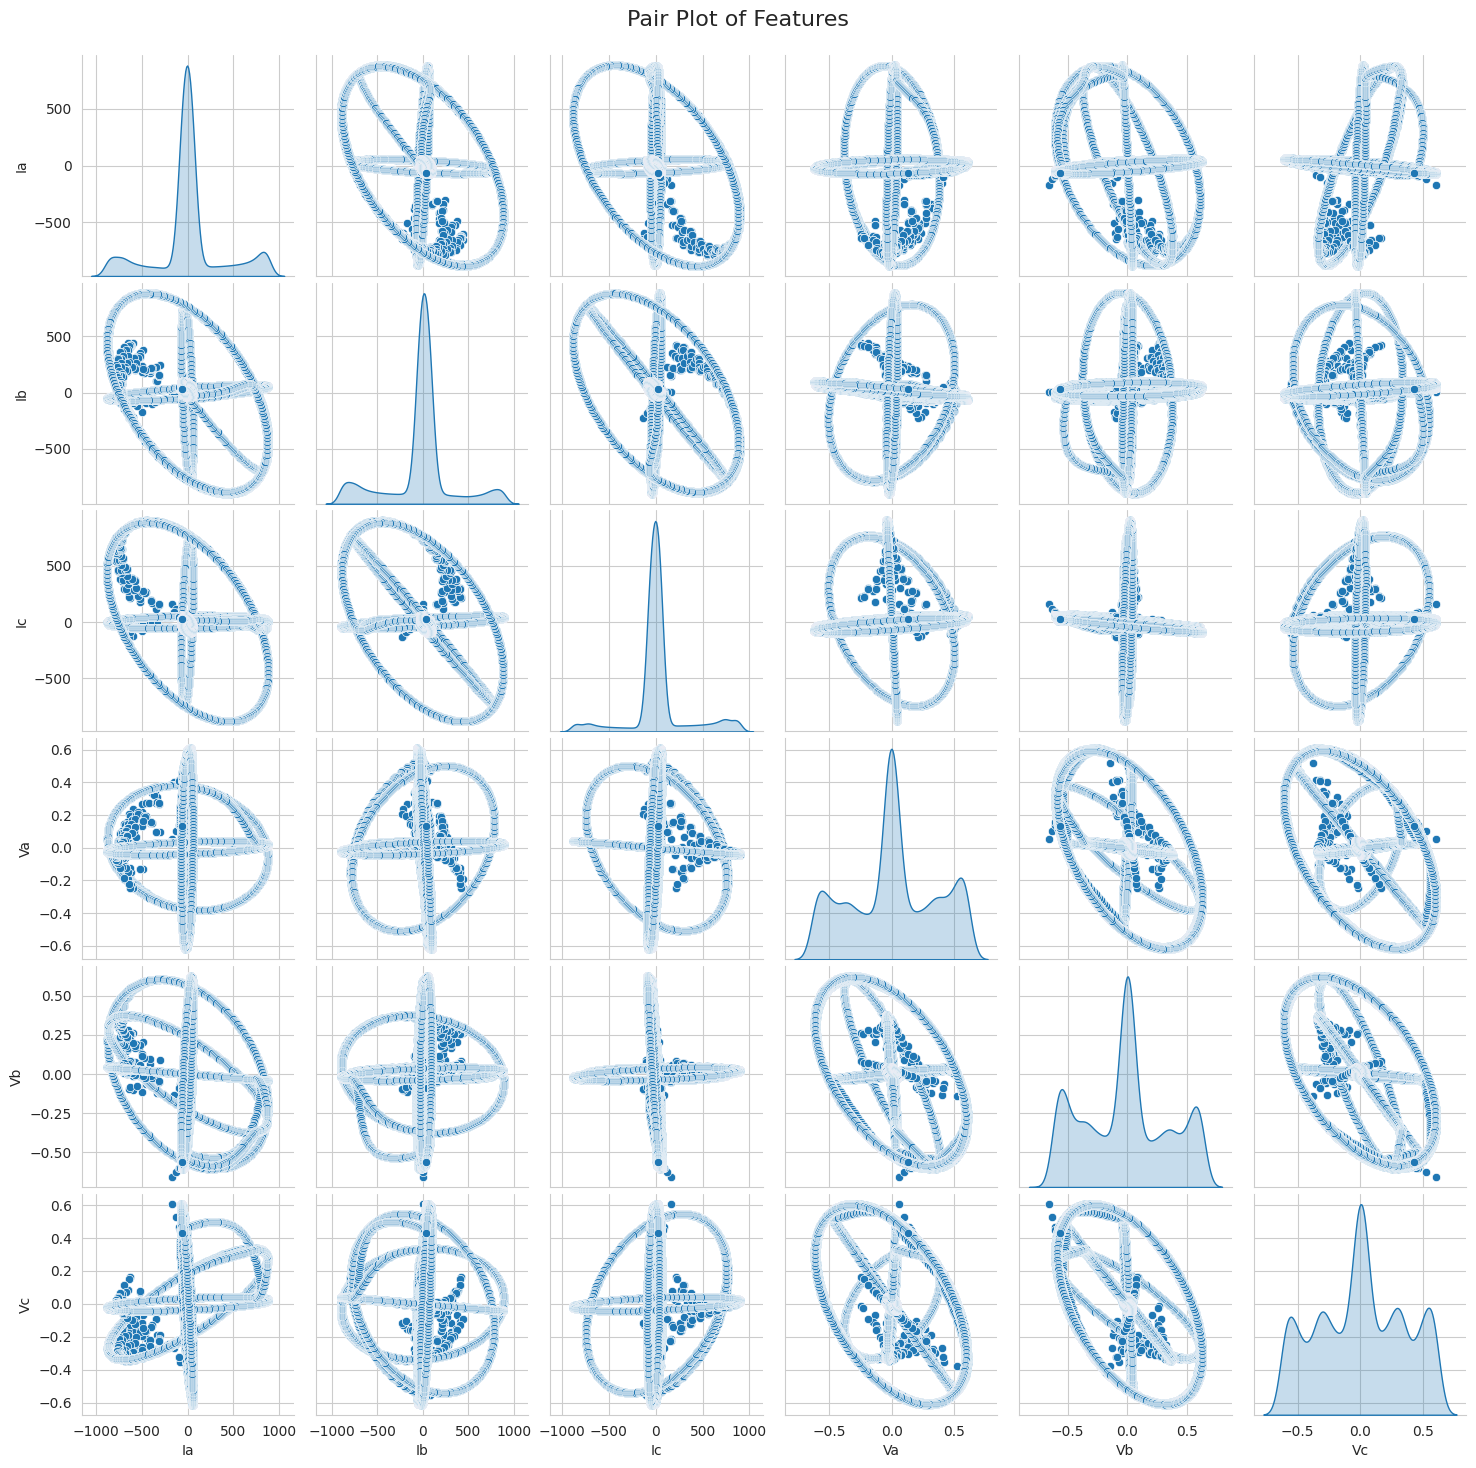

In [8]:
# Pair plot with KDE on the diagonal and custom color palette
pair_plot = sns.pairplot(df.drop('Output (S)', axis=1), diag_kind='kde', palette=sns.color_palette("rocket", as_cmap=True))
pair_plot.fig.suptitle('Pair Plot of Features', fontsize=16)
pair_plot.fig.subplots_adjust(top=0.95)
plt.show()

**shows scatter plot among each column**

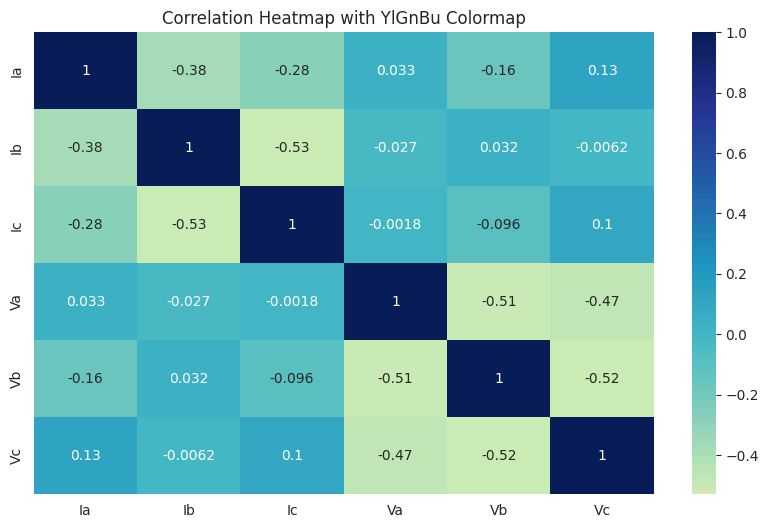

In [9]:
# Custom colormap: "YlGnBu" for a vibrant look
plt.figure(figsize=(10, 6))
sns.heatmap(df.drop('Output (S)', axis=1).corr(), annot=True, cmap='YlGnBu', center=0)
plt.title('Correlation Heatmap with YlGnBu Colormap')
plt.show()

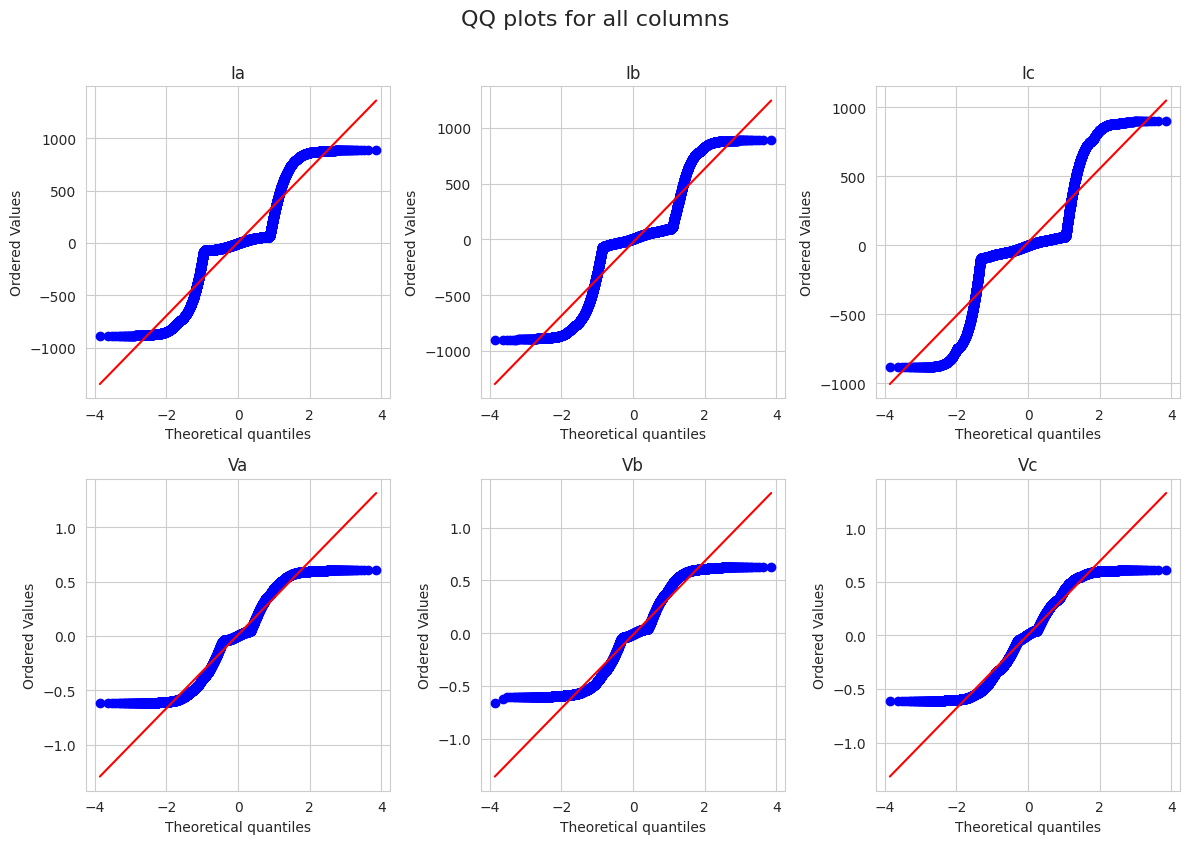

In [10]:
ls = ['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc']

plt.figure(figsize=(12, 8))

for i in range(2):
    for j in range(3):
        plt.subplot(2, 3, i * 3 + (j + 1))
        stats.probplot(df[ls[i*3+j]], dist="norm", plot=plt)
        plt.title(ls[i*3+j])

plt.tight_layout()
plt.suptitle('QQ plots for all columns', y=1.05, fontsize=16)
plt.show()


**Values of each column are somewhat normally distributed**

## Train Test Split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(df.drop('Output (S)',axis=1),df['Output (S)'],random_state=42,test_size=0.2)

In [12]:
# Standardize the dataset
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Convert back to DataFrame for PyTorch Tabular compatibility
train_data = pd.DataFrame(x_train, columns=df.columns[:-1])
train_data['Output (S)'] = y_train.values
test_data = pd.DataFrame(x_test, columns=df.columns[:-1])
test_data['Output (S)'] = y_test.values

In [13]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).view(-1, 1)

# Create TensorDatasets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)


Neural Oblivious Decision Ensembles (NODE)

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:


class NODE(nn.Module):
    def __init__(self, input_dim):
        super(NODE, self).__init__()

        # Convolutional layers to extract features
        self.conv1 = nn.Conv1d(input_dim, 64, kernel_size=3, padding=1)
        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)

        # Attention mechanism (Simple) to focus on important features
        self.attn_layer = nn.Linear(128, 128)

        # GRU layer to capture sequential dependencies (if any)
        self.gru = nn.GRU(128, 128, batch_first=True)

        # Fully connected layers
        self.fc1 = nn.Linear(128, 64)
        self.fc2 = nn.Linear(64, 32)
        self.fc3 = nn.Linear(32, 1)

        # Batch Normalization and Dropout for regularization
        self.bn1 = nn.BatchNorm1d(64)
        self.bn2 = nn.BatchNorm1d(128)
        self.dropout = nn.Dropout(0.5)

        # Activation function
        self.activation = nn.LeakyReLU(negative_slope=0.1)

    def forward(self, x):
        # Reshape the input to [batch_size, num_channels, sequence_length]
        x = x.unsqueeze(2)  # Add a sequence length dimension

        # Convolutional layers with Batch Normalization
        x = self.bn1(self.activation(self.conv1(x)))
        x = self.dropout(x)
        x = self.bn2(self.activation(self.conv2(x)))
        x = self.dropout(x)

        # Reshape for attention mechanism
        batch_size, num_features, seq_length = x.size()
        x = x.view(batch_size, seq_length, num_features)

        # Apply attention mechanism (softmax over features)
        attention_weights = torch.softmax(self.attn_layer(x), dim=2)
        x = x * attention_weights  # Weighted features

        # Pass through GRU layer for sequential pattern capture
        x, _ = self.gru(x)

        # Use only the last output from GRU (for classification)
        x = x[:, -1, :]

        # Fully connected layers
        x = self.fc1(x)
        x = self.activation(x)
        x = self.fc2(x)
        x = self.activation(x)
        x = torch.sigmoid(self.fc3(x))  # Sigmoid for binary classification

        return x

In [15]:
# Ensure you instantiate the model with the correct input_dim
input_dim = 6  # Number of input features (Ia, Ib, Ic, Va, Vb, Vc)
model = NODE(input_dim)

In [16]:
# Training function
def train_model(model, train_loader, criterion, optimizer, num_epochs=50):
    model.train()
    for epoch in range(num_epochs):
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()

# Validation function
def validate_model(model, test_loader, criterion):
    model.eval()
    with torch.no_grad():
        test_loss = 0
        correct = 0
        total = 0
        for X_batch, y_batch in test_loader:
            outputs = model(X_batch)
            test_loss += criterion(outputs, y_batch).item()
            predicted = (outputs > 0.5).float()
            correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)
        accuracy = correct / total
        return test_loss / len(test_loader), accuracy

**ANN is also performing well and might perform even better with some tweking**

In [17]:
import torch.optim as optim

# Define loss function and optimizer
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [18]:
# Initialize lists to store metrics
train_losses = []
train_accuracies = []
val_losses = []
val_accuracies = []

def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50):
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        running_correct = 0
        total = 0

        # Training loop
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            outputs = model(X_batch)
            loss = criterion(outputs, y_batch)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

            # Calculate training accuracy
            predicted = (outputs > 0.5).float()
            running_correct += (predicted == y_batch).sum().item()
            total += y_batch.size(0)

        # Calculate training loss and accuracy
        train_loss = running_loss / len(train_loader)
        train_accuracy = running_correct / total

        # Validate the model at each epoch
        model.eval()
        val_running_loss = 0.0
        val_correct = 0
        val_total = 0

        with torch.no_grad():
            for X_batch, y_batch in test_loader:
                outputs = model(X_batch)
                loss = criterion(outputs, y_batch)
                val_running_loss += loss.item()

                predicted = (outputs > 0.5).float()
                val_correct += (predicted == y_batch).sum().item()
                val_total += y_batch.size(0)

        # Calculate validation loss and accuracy
        val_loss = val_running_loss / len(test_loader)
        val_accuracy = val_correct / val_total

        # Append metrics for plotting later
        train_losses.append(train_loss)
        train_accuracies.append(train_accuracy)
        val_losses.append(val_loss)
        val_accuracies.append(val_accuracy)

        # Print metrics for this epoch
        print(f'Epoch [{epoch + 1}/{num_epochs}], '
              f'Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}, '
              f'Val Loss: {val_loss:.4f}, Val Accuracy: {val_accuracy:.4f}')

In [19]:
# Train and validate the model
train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50)

# Validate final model performance
test_loss, test_accuracy = validate_model(model, test_loader, criterion)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

Epoch [1/50], Train Loss: 0.2673, Train Accuracy: 0.8729, Val Loss: 0.0799, Val Accuracy: 0.9742
Epoch [2/50], Train Loss: 0.1044, Train Accuracy: 0.9689, Val Loss: 0.0599, Val Accuracy: 0.9808
Epoch [3/50], Train Loss: 0.0908, Train Accuracy: 0.9738, Val Loss: 0.0512, Val Accuracy: 0.9850
Epoch [4/50], Train Loss: 0.0915, Train Accuracy: 0.9740, Val Loss: 0.0468, Val Accuracy: 0.9854
Epoch [5/50], Train Loss: 0.0860, Train Accuracy: 0.9753, Val Loss: 0.0466, Val Accuracy: 0.9871
Epoch [6/50], Train Loss: 0.0837, Train Accuracy: 0.9757, Val Loss: 0.0420, Val Accuracy: 0.9871
Epoch [7/50], Train Loss: 0.0743, Train Accuracy: 0.9777, Val Loss: 0.0382, Val Accuracy: 0.9896
Epoch [8/50], Train Loss: 0.0774, Train Accuracy: 0.9779, Val Loss: 0.0438, Val Accuracy: 0.9867
Epoch [9/50], Train Loss: 0.0652, Train Accuracy: 0.9828, Val Loss: 0.0436, Val Accuracy: 0.9875
Epoch [10/50], Train Loss: 0.0700, Train Accuracy: 0.9793, Val Loss: 0.0369, Val Accuracy: 0.9888
Epoch [11/50], Train Loss: 0.

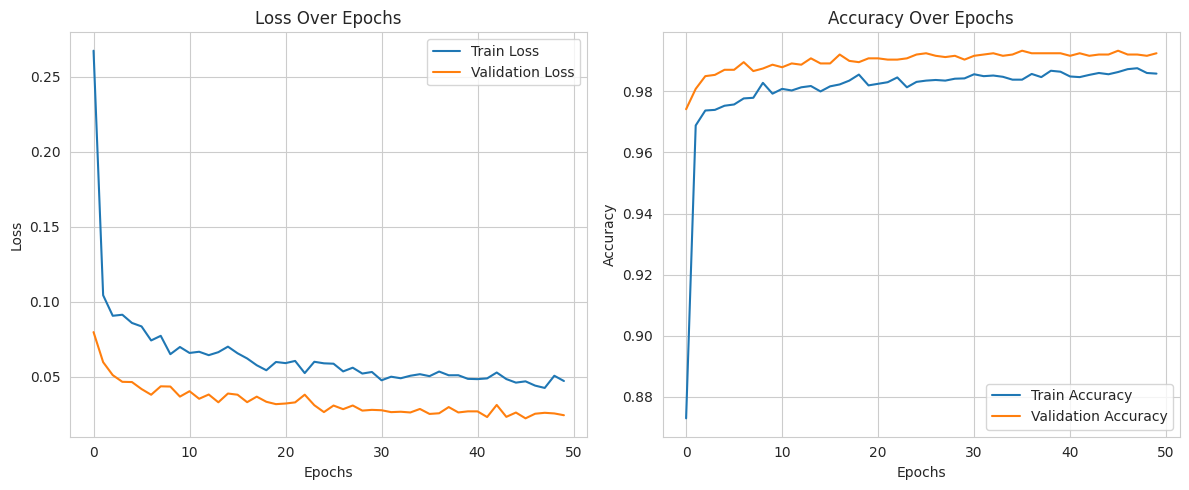

In [20]:
# Plotting the accuracy and loss charts
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Train Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Train Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [21]:
# Confusion Matrix
y_true = []
y_pred = []

# Get predictions from the test set
model.eval()
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        outputs = model(X_batch)
        predicted = (outputs > 0.5).float()
        y_true.extend(y_batch.numpy())
        y_pred.extend(predicted.numpy())

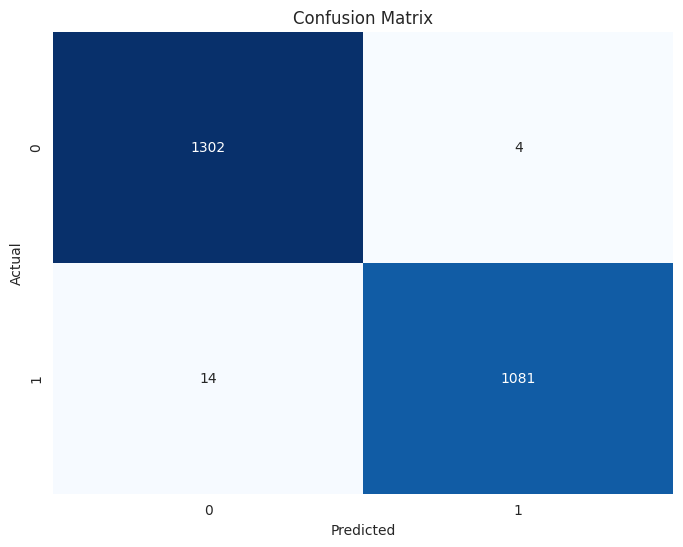

In [22]:
# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1306
           1       1.00      0.99      0.99      1095

    accuracy                           0.99      2401
   macro avg       0.99      0.99      0.99      2401
weighted avg       0.99      0.99      0.99      2401

